## Installing, Importing and Preprocessing spaCy

In [134]:
# Install and import spacy and plotly.
!pip install spaCy
!pip install plotly
!pip install nbformat==5.1.2

In [135]:
# Import spacy
import spacy

# Install English language model
!spacy download en_core_web_sm

# Import os to upload documents and metadata
import os

# Load spaCy visualizer
from spacy import displacy

from spacy.matcher import Matcher

# Import pandas DataFrame packages
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# Import graphing package
import plotly.graph_objects as go
import plotly.express as px

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 15.1 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [136]:
# Load nlp pipeline
nlp = spacy.load('en_core_web_sm')

# Check what functions it performs
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


## Importing necessary libraries

In [166]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import datetime
from urllib.parse import urljoin
import re
import string
import nltk
import string 
from collections import Counter
import nltk
import string 
from nltk.corpus import stopwords
import csv

In [138]:
pd.set_option('display.max_columns', None)

## Load metadata

In [139]:
women_speech = pd.read_csv('women_speech.csv')

In [140]:
women_speech

,Title,Speaker,Transcript,Year
0,Ursula K. Le Guin - A Left-Handed Commencemen...,Ursula K. Le Guin,I want to thank the Mills College Class of '83...,1983
1,Elizabeth Gurley Flynn -- Statement at the Sm...,Elizabeth Gurley Flynn,"Your Honor, ladies and gentlemen, myname is El...",1952
2,Mary Fisher -- 1992 Republican National Conve...,MaryFisher,Less than three months ago at platform hearing...,1992
3,Carrie Chapman Catt - The Crisis,Carrie Chapman Catt,"I have taken for my subject, ""The Crisis,"" bec...",1916
4,"Margaret Chase Smith -- ""Declaration of Consc...",Margaret Chase Smith,r. President: I would like to speak briefly an...,1950
5,Ann Richards - Democratic National Convention...,Ann Richards,"Thank you, very much. Good evening, ladies and...",1988
6,Anna Howard Shaw - The Fundamental Principle ...,Anna Howard Shaw,"When I came into your hall tonight, I thought ...",1915
7,Margaret Sanger - The Children's Era Speech,Margaret Sanger,"Mr. Chairman, Ladies and Gentlemen: My subject...",1925
8,Barbara Jordan - Statement on House Judiciary...,Barbara Charline Jordan,"Thank you, Mr. Chairman. Mr. Chairman, I join ...",1974
9,Barbara Jordan - 1976 Democratic National Con...,Barbara Charline Jordan,Thank you ladies and gentlemen for a very warm...,1976


## Runs the nlp pipeline

In [141]:
# Define a function that runs the nlp pipeline on any given input text
def process_text(text):
    return nlp(text)

In [142]:
# Apply the function to the "Transcript" column, so that the nlp pipeline is called on each speech
women_speech['Doc'] = women_speech['Transcript'].apply(process_text)

## Text reduction - Tokenization

In [143]:
# Define a function to retrieve tokens from a doc object
def get_token(doc):
    return [(token.text) for token in doc]

In [144]:
# Run the token retrieval function on the doc objects in the dataframe
women_speech['Tokens'] = women_speech['Doc'].apply(get_token)
women_speech.head()

,Title,Speaker,Transcript,Year,Doc,Tokens
0,Ursula K. Le Guin - A Left-Handed Commencemen...,Ursula K. Le Guin,I want to thank the Mills College Class of '83...,1983,"(I, want, to, thank, the, Mills, College, Clas...","[I, want, to, thank, the, Mills, College, Clas..."
1,Elizabeth Gurley Flynn -- Statement at the Sm...,Elizabeth Gurley Flynn,"Your Honor, ladies and gentlemen, myname is El...",1952,"(Your, Honor, ,, ladies, and, gentlemen, ,, my...","[Your, Honor, ,, ladies, and, gentlemen, ,, my..."
2,Mary Fisher -- 1992 Republican National Conve...,MaryFisher,Less than three months ago at platform hearing...,1992,"(Less, than, three, months, ago, at, platform,...","[Less, than, three, months, ago, at, platform,..."
3,Carrie Chapman Catt - The Crisis,Carrie Chapman Catt,"I have taken for my subject, ""The Crisis,"" bec...",1916,"(I, have, taken, for, my, subject, ,, "", The, ...","[I, have, taken, for, my, subject, ,, "", The, ..."
4,"Margaret Chase Smith -- ""Declaration of Consc...",Margaret Chase Smith,r. President: I would like to speak briefly an...,1950,"(r., President, :, I, would, like, to, speak, ...","[r., President, :, I, would, like, to, speak, ..."


## Text reduction - Lemmatization

In [145]:
# Define a function to retrieve lemmas from a doc object
def get_lemma(doc):
    return [(token.lemma_) for token in doc]

# Run the lemma retrieval function on the doc objects in the dataframe
women_speech['Lemmas'] = women_speech['Doc'].apply(get_lemma)
women_speech.head()

,Title,Speaker,Transcript,Year,Doc,Tokens,Lemmas
0,Ursula K. Le Guin - A Left-Handed Commencemen...,Ursula K. Le Guin,I want to thank the Mills College Class of '83...,1983,"(I, want, to, thank, the, Mills, College, Clas...","[I, want, to, thank, the, Mills, College, Clas...","[I, want, to, thank, the, Mills, College, Clas..."
1,Elizabeth Gurley Flynn -- Statement at the Sm...,Elizabeth Gurley Flynn,"Your Honor, ladies and gentlemen, myname is El...",1952,"(Your, Honor, ,, ladies, and, gentlemen, ,, my...","[Your, Honor, ,, ladies, and, gentlemen, ,, my...","[your, Honor, ,, lady, and, gentleman, ,, myna..."
2,Mary Fisher -- 1992 Republican National Conve...,MaryFisher,Less than three months ago at platform hearing...,1992,"(Less, than, three, months, ago, at, platform,...","[Less, than, three, months, ago, at, platform,...","[Less, than, three, month, ago, at, platform, ..."
3,Carrie Chapman Catt - The Crisis,Carrie Chapman Catt,"I have taken for my subject, ""The Crisis,"" bec...",1916,"(I, have, taken, for, my, subject, ,, "", The, ...","[I, have, taken, for, my, subject, ,, "", The, ...","[I, have, take, for, my, subject, ,, "", the, C..."
4,"Margaret Chase Smith -- ""Declaration of Consc...",Margaret Chase Smith,r. President: I would like to speak briefly an...,1950,"(r., President, :, I, would, like, to, speak, ...","[r., President, :, I, would, like, to, speak, ...","[r., President, :, I, would, like, to, speak, ..."


### ❓ What are the most frequent words used in female American political speeches of the 20th century? How do these words reflect the emphasis on gender equality?

In [146]:
# Get the English stop words
stop_words = set(stopwords.words('english'))

# Combine all lemmas into a single list and remove stop words
all_lemmas = [lemma for lemmas in women_speech['Lemmas'] for lemma in lemmas if lemma.lower() not in stop_words and lemma not in string.punctuation and not lemma.isspace()]

# Calculate word frequencies
word_freq = Counter(all_lemmas)

# Get the most frequent words
most_common_words = word_freq.most_common(20)  # Change the number to get more or fewer words

# Print the most frequent words
for word, freq in most_common_words:
    print(f"{word}: {freq}")

woman: 388
man: 263
--: 232
would: 221
people: 217
right: 181
say: 177
one: 170
know: 139
go: 138
make: 134
time: 128
work: 118
must: 116
world: 115
human: 114
country: 113
great: 111
vote: 111
come: 108


The most frequent words in these speeches are related to gender, political and social issues, activism, and advocacy. Words like "woman," "man," "rights," "vote," and "country" suggests an emphasis on gender equality and civil rights. These speeches might address the challenges and aspirations of the 20th-century women in the political sphere.

## Text annotation - Part of Speech Tagging (POS)

In [147]:
# Define a function to extract the coarse- and fine-grained part-of-speech (POS) tags for each token in the "doc" object
def get_pos(doc):
    return [(token.pos_, token.tag_) for token in doc]

women_speech['POS'] = women_speech['Doc'].apply(get_pos)

In [148]:
women_speech.head()

,Title,Speaker,Transcript,Year,Doc,Tokens,Lemmas,POS
0,Ursula K. Le Guin - A Left-Handed Commencemen...,Ursula K. Le Guin,I want to thank the Mills College Class of '83...,1983,"(I, want, to, thank, the, Mills, College, Clas...","[I, want, to, thank, the, Mills, College, Clas...","[I, want, to, thank, the, Mills, College, Clas...","[(PRON, PRP), (VERB, VBP), (PART, TO), (VERB, ..."
1,Elizabeth Gurley Flynn -- Statement at the Sm...,Elizabeth Gurley Flynn,"Your Honor, ladies and gentlemen, myname is El...",1952,"(Your, Honor, ,, ladies, and, gentlemen, ,, my...","[Your, Honor, ,, ladies, and, gentlemen, ,, my...","[your, Honor, ,, lady, and, gentleman, ,, myna...","[(PRON, PRP$), (PROPN, NNP), (PUNCT, ,), (NOUN..."
2,Mary Fisher -- 1992 Republican National Conve...,MaryFisher,Less than three months ago at platform hearing...,1992,"(Less, than, three, months, ago, at, platform,...","[Less, than, three, months, ago, at, platform,...","[Less, than, three, month, ago, at, platform, ...","[(ADJ, JJR), (ADP, IN), (NUM, CD), (NOUN, NNS)..."
3,Carrie Chapman Catt - The Crisis,Carrie Chapman Catt,"I have taken for my subject, ""The Crisis,"" bec...",1916,"(I, have, taken, for, my, subject, ,, "", The, ...","[I, have, taken, for, my, subject, ,, "", The, ...","[I, have, take, for, my, subject, ,, "", the, C...","[(PRON, PRP), (AUX, VBP), (VERB, VBN), (ADP, I..."
4,"Margaret Chase Smith -- ""Declaration of Consc...",Margaret Chase Smith,r. President: I would like to speak briefly an...,1950,"(r., President, :, I, would, like, to, speak, ...","[r., President, :, I, would, like, to, speak, ...","[r., President, :, I, would, like, to, speak, ...","[(PROPN, NNP), (PROPN, NNP), (PUNCT, :), (PRON..."


In [165]:
# Create a list of part of speech tags
#list(women_speech['POS'])

### Extract proper nouns

In [150]:
# Define function to extract proper nouns from Doc object
def extract_proper_nouns(doc):
    return [token.text for token in doc if token.pos_ == 'PROPN']

# Apply function to Doc column and store resulting proper nouns in new column
women_speech['Proper_Nouns'] = women_speech['Doc'].apply(extract_proper_nouns)

### ❓ What is the most frequently mentioned proper nouns across all the speeches by different female speakers in the 20th century?

In [151]:
# Group the speeches by Speaker and count the occurrence of each proper noun
grouped_speeches = women_speech.groupby('Speaker')['Proper_Nouns'].sum().apply(pd.Series).stack().reset_index(level=1, drop=True).reset_index(name='Proper_Noun_Count')

# Calculate the frequency of each proper noun across all speeches
noun_frequency = grouped_speeches['Proper_Noun_Count'].value_counts().reset_index(name='Frequency')

# Print the top 20 most frequently mentioned proper nouns
noun_frequency.head(20)

,Proper_Noun_Count,Frequency
0,America,70
1,Party,69
2,United,56
3,President,52
4,States,42
5,Mr.,37
6,Government,36
7,Declaration,34
8,Republic,33
9,Communist,33


The most frequently mentioned proper nouns across all the speeches shows that these speeches cover topics such as American society, politics, and ideologies. For instance, the mention of "Party" perhaps indicates that these speeches concerned political party ideologies, and women's involvement in political parties. The mention of "Government" and "Declaration" implies that the speeches may discuss women's contributions to government policies, and the principles in the Declaration of Independence. "Rights" and "Constitution" indicate that the speeches likely address women's rights, gender equality, and civil liberties. "Senate" indicates that the speeches may highlight women's involvement in the Senate.

### ❓ How does the frequency of proper nouns vary across different speakers and time periods?

In [152]:
# Calculate the frequency of each word for each speaker
word_frequency = grouped_speeches.groupby(['Speaker', 'Proper_Noun_Count']).size().reset_index(name='Frequency')

# Sort the word frequencies in descending order for each speaker
word_frequency = word_frequency.sort_values(['Speaker', 'Frequency'], ascending=[True, False])

# Get the most frequently mentioned word for each speaker
most_frequent_words = word_frequency.groupby('Speaker').first().reset_index()

# Print the top 10 most frequently mentioned words for each speaker
most_frequent_words

,Speaker,Proper_Noun_Count,Frequency
0,Anita Hill,Thomas,22
1,Ann Richards,America,16
2,Anna Howard Shaw,Republic,28
3,Barbara Charline Jordan,President,28
4,Barbara Pierce Bush,Wellesley,6
5,Carrie Chapman Catt,American,6
6,Eleanor Roosevelt,Declaration,27
7,Elizabeth Glaser,America,13
8,Elizabeth Gurley Flynn,Party,47
9,Emma Goldman,Attorney,15


In [153]:
# Group the speeches by Year and count the occurrence of each proper noun
grouped_speeches2 = women_speech.groupby('Year')['Proper_Nouns'].sum().apply(pd.Series).stack().reset_index(level=1, drop=True).reset_index(name='Proper_Noun_Count')

# Calculate the frequency of each word for each year
word_frequency2 = grouped_speeches2.groupby(['Year', 'Proper_Noun_Count']).size().reset_index(name='Frequency')

# Sort the word frequencies in descending order for each year
word_frequency2 = word_frequency2.sort_values(['Year', 'Frequency'], ascending=[True, False])

# Get the most frequently mentioned word for each year
most_frequent_words2 = word_frequency2.groupby('Year').first().reset_index()

# Print the top 10 most frequently mentioned words for each year
most_frequent_words2

,Year,Proper_Noun_Count,Frequency
0,1915,Republic,28
1,1916,Hour,6
2,1917,Attorney,15
3,1925,Children,6
4,1948,Declaration,27
5,1950,Senate,13
6,1952,Party,47
7,1970,State,9
8,1974,President,26
9,1976,America,8


"America" and "State" were frequently mentioned by many speakers (Ann Richards, Elizabeth Glaser, etc.), indicating a common focus on the country and perhpas their participation in American politics. Barbara Jordan mentioned "President" frequently, suggesting a focus on the presidency. Elizabeth Flynn frequently mentioned "Party," indicating a focus on political parties. Mary Fisher mentioned "AIDS" multiple times, indicating a focus on health issue.
The increasing frequency of the proper noun "America" in 1976, 1984, and 1988 suggests it may be related to significant events or themes during that period. The focus of "Beijing" in 1995 might suggest a discussions involving China's development in this year. 

In [154]:
# Create new DataFrame for analysis purposes
pos_analysis_df = women_speech[['Title','Speaker', 'Doc']]

# Create list to store each dictionary
num_list = []

# Define a function to get part of speech tags and counts and append them to a new dictionary
def get_pos_tags(doc):
    dictionary = {}
    num_pos = doc.count_by(spacy.attrs.POS)
    for k,v in sorted(num_pos.items()):
        dictionary[doc.vocab[k].text] = v
    num_list.append(dictionary)

# Apply function to each doc object in DataFrame
pos_analysis_df.loc['C_POS'] = pos_analysis_df['Doc'].apply(get_pos_tags)

# Create new dataframe with part of speech counts
pos_counts = pd.DataFrame(num_list)
columns = list(pos_counts.columns)

# Add speaker of each speech as new column to dataframe
idx = 0
new_col = pos_analysis_df['Speaker']
pos_counts.insert(loc=idx, column='Speaker', value=new_col)

In [155]:
# Get average part of speech counts used in speech of each speaker
average_pos_df = pos_counts.groupby(['Speaker']).mean()

# Round calculations to the nearest whole number
average_pos_df = average_pos_df.round(0)

# Reset index to improve DataFrame readability
average_pos_df = average_pos_df.reset_index()

# Show dataframe
average_pos_df

,Speaker,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,PUNCT,SCONJ,VERB,X,SPACE,SYM
0,Anita Hill,147.0,347.0,99.0,159.0,83.0,213.0,2.0,396.0,32.0,70.0,372.0,158.0,277.0,79.0,306.0,2.0,2.0,NaN
1,Ann Richards,157.0,245.0,114.0,168.0,159.0,218.0,16.0,483.0,21.0,69.0,405.0,158.0,328.0,110.0,390.0,3.0,66.0,NaN
2,Anna Howard Shaw,508.0,996.0,446.0,793.0,483.0,1042.0,12.0,1694.0,85.0,371.0,1285.0,237.0,965.0,413.0,1241.0,2.0,1.0,1.0
3,Barbara Charline Jordan,112.0,166.0,48.0,144.0,52.0,212.0,2.0,313.0,13.0,64.0,192.0,102.0,243.0,54.0,218.0,1.0,4.0,NaN
4,Barbara Pierce Bush,77.0,104.0,66.0,99.0,55.0,97.0,2.0,215.0,16.0,44.0,160.0,60.0,225.0,25.0,154.0,NaN,2.0,NaN
5,Carrie Chapman Catt,262.0,439.0,137.0,274.0,151.0,398.0,2.0,803.0,31.0,88.0,320.0,114.0,475.0,85.0,420.0,2.0,1.0,NaN
6,Eleanor Roosevelt,225.0,378.0,86.0,173.0,102.0,321.0,1.0,586.0,18.0,84.0,236.0,136.0,242.0,57.0,274.0,4.0,1.0,NaN
7,Elizabeth Glaser,47.0,93.0,51.0,96.0,50.0,82.0,1.0,183.0,11.0,61.0,179.0,60.0,168.0,41.0,158.0,NaN,1.0,NaN
8,Elizabeth Gurley Flynn,568.0,1010.0,281.0,491.0,333.0,763.0,5.0,1629.0,100.0,226.0,880.0,629.0,1161.0,178.0,876.0,4.0,300.0,NaN
9,Emma Goldman,323.0,602.0,199.0,405.0,214.0,550.0,5.0,993.0,40.0,180.0,568.0,255.0,578.0,179.0,574.0,NaN,189.0,1.0


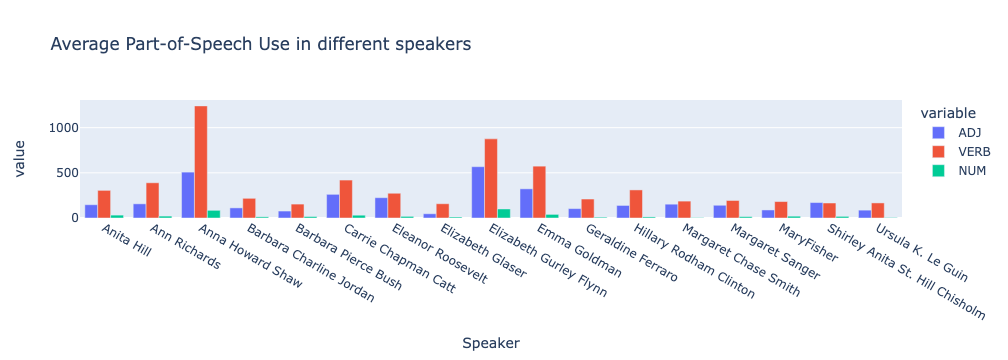

In [156]:
# Use plotly to plot POS use per speaker
fig = px.bar(average_pos_df, x="Speaker", y=["ADJ", 'VERB', "NUM"], title="Average Part-of-Speech Use in different speakers", barmode='group')
fig.show()

Different speakers have varying frequencies of different parts of speech in their speeches. For example, Anna Howard Shaw have a higher occurrence of verbs, while Elizabeth Gurley Flynn have a higher occurrence of adjectives. Hence, we can infer that Anna Howard Shaw may use action and dynamic language to make her speeches more engaging. Elizabeth Gurley Flynn may focus on descriptive language to make her speeches more clear and detailed.

## Text annotation - Named Entity Recognition

In [157]:
# Get all NE labels and assign to variable
labels = nlp.get_pipe("ner").labels

# Print each label and its description
for label in labels:
    print(label + ' : ' + spacy.explain(label))

CARDINAL : Numerals that do not fall under another type
DATE : Absolute or relative dates or periods
EVENT : Named hurricanes, battles, wars, sports events, etc.
FAC : Buildings, airports, highways, bridges, etc.
GPE : Countries, cities, states
LANGUAGE : Any named language
LAW : Named documents made into laws.
LOC : Non-GPE locations, mountain ranges, bodies of water
MONEY : Monetary values, including unit
NORP : Nationalities or religious or political groups
ORDINAL : "first", "second", etc.
ORG : Companies, agencies, institutions, etc.
PERCENT : Percentage, including "%"
PERSON : People, including fictional
PRODUCT : Objects, vehicles, foods, etc. (not services)
QUANTITY : Measurements, as of weight or distance
TIME : Times smaller than a day
WORK_OF_ART : Titles of books, songs, etc.


In [158]:
# Define function to extract named entities from doc objects
def extract_named_entities(doc):
    return [ent.label_ for ent in doc.ents]

# Apply function to Doc column and store resulting named entities in new column
women_speech['Named_Entities'] = women_speech['Doc'].apply(extract_named_entities)
women_speech.head()

,Title,Speaker,Transcript,Year,Doc,Tokens,Lemmas,POS,Proper_Nouns,Named_Entities
0,Ursula K. Le Guin - A Left-Handed Commencemen...,Ursula K. Le Guin,I want to thank the Mills College Class of '83...,1983,"(I, want, to, thank, the, Mills, College, Clas...","[I, want, to, thank, the, Mills, College, Clas...","[I, want, to, thank, the, Mills, College, Clas...","[(PRON, PRP), (VERB, VBP), (PART, TO), (VERB, ...","[Mills, College, Class, Greek, Greek, If, Gre...","[DATE, NORP, NORP, NORP, DATE, PERSON, PERSON,..."
1,Elizabeth Gurley Flynn -- Statement at the Sm...,Elizabeth Gurley Flynn,"Your Honor, ladies and gentlemen, myname is El...",1952,"(Your, Honor, ,, ladies, and, gentlemen, ,, my...","[Your, Honor, ,, ladies, and, gentlemen, ,, my...","[your, Honor, ,, lady, and, gentleman, ,, myna...","[(PRON, PRP$), (PROPN, NNP), (PUNCT, ,), (NOUN...","[Honor, Elizabeth, Gurley, Flynn, Mr., Pettis,...","[PERSON, PERSON, NORP, ORG, GPE, ORG, DATE, NO..."
2,Mary Fisher -- 1992 Republican National Conve...,MaryFisher,Less than three months ago at platform hearing...,1992,"(Less, than, three, months, ago, at, platform,...","[Less, than, three, months, ago, at, platform,...","[Less, than, three, month, ago, at, platform, ...","[(ADJ, JJR), (ADP, IN), (NUM, CD), (NOUN, NNS)...","[Salt, Lake, City, Republican, Party, HIV, AID...","[DATE, GPE, ORG, TIME, CARDINAL, NORP, CARDINA..."
3,Carrie Chapman Catt - The Crisis,Carrie Chapman Catt,"I have taken for my subject, ""The Crisis,"" bec...",1916,"(I, have, taken, for, my, subject, ,, "", The, ...","[I, have, taken, for, my, subject, ,, "", The, ...","[I, have, take, for, my, subject, ,, "", the, C...","[(PRON, PRP), (AUX, VBP), (VERB, VBN), (ADP, I...","[Crisis, America, Hour, united, American, Civi...","[DATE, DATE, DATE, DATE, GPE, DATE, ORG, ORDIN..."
4,"Margaret Chase Smith -- ""Declaration of Consc...",Margaret Chase Smith,r. President: I would like to speak briefly an...,1950,"(r., President, :, I, would, like, to, speak, ...","[r., President, :, I, would, like, to, speak, ...","[r., President, :, I, would, like, to, speak, ...","[(PROPN, NNP), (PROPN, NNP), (PUNCT, :), (PRON...","[r., President, Americans, Legislative, Branch...","[NORP, NORP, ORG, ORG, NORP, GPE, NORP, GPE, O..."


In [159]:
# Define function to extract text tagged with named entities from doc objects
def extract_named_entities(doc):
    return [ent for ent in doc.ents]

# Apply function to Doc column and store resulting text in new column
women_speech['NE_Words'] = women_speech['Doc'].apply(extract_named_entities)
women_speech.head()

,Title,Speaker,Transcript,Year,Doc,Tokens,Lemmas,POS,Proper_Nouns,Named_Entities,NE_Words
0,Ursula K. Le Guin - A Left-Handed Commencemen...,Ursula K. Le Guin,I want to thank the Mills College Class of '83...,1983,"(I, want, to, thank, the, Mills, College, Clas...","[I, want, to, thank, the, Mills, College, Clas...","[I, want, to, thank, the, Mills, College, Clas...","[(PRON, PRP), (VERB, VBP), (PART, TO), (VERB, ...","[Mills, College, Class, Greek, Greek, If, Gre...","[DATE, NORP, NORP, NORP, DATE, PERSON, PERSON,...","[(', 83), (Greek), (Greek), (Greek), (twelfth,..."
1,Elizabeth Gurley Flynn -- Statement at the Sm...,Elizabeth Gurley Flynn,"Your Honor, ladies and gentlemen, myname is El...",1952,"(Your, Honor, ,, ladies, and, gentlemen, ,, my...","[Your, Honor, ,, ladies, and, gentlemen, ,, my...","[your, Honor, ,, lady, and, gentleman, ,, myna...","[(PRON, PRP$), (PROPN, NNP), (PUNCT, ,), (NOUN...","[Honor, Elizabeth, Gurley, Flynn, Mr., Pettis,...","[PERSON, PERSON, NORP, ORG, GPE, ORG, DATE, NO...","[(Elizabeth, Gurley, Flynn), (Pettis, Perry), ..."
2,Mary Fisher -- 1992 Republican National Conve...,MaryFisher,Less than three months ago at platform hearing...,1992,"(Less, than, three, months, ago, at, platform,...","[Less, than, three, months, ago, at, platform,...","[Less, than, three, month, ago, at, platform, ...","[(ADJ, JJR), (ADP, IN), (NUM, CD), (NOUN, NNS)...","[Salt, Lake, City, Republican, Party, HIV, AID...","[DATE, GPE, ORG, TIME, CARDINAL, NORP, CARDINA...","[(Less, than, three, months, ago), (Salt, Lake..."
3,Carrie Chapman Catt - The Crisis,Carrie Chapman Catt,"I have taken for my subject, ""The Crisis,"" bec...",1916,"(I, have, taken, for, my, subject, ,, "", The, ...","[I, have, taken, for, my, subject, ,, "", The, ...","[I, have, take, for, my, subject, ,, "", the, C...","[(PRON, PRP), (AUX, VBP), (VERB, VBN), (ADP, I...","[Crisis, America, Hour, united, American, Civi...","[DATE, DATE, DATE, DATE, GPE, DATE, ORG, ORDIN...","[(today), (yesterday), (the, year, 1916), (the..."
4,"Margaret Chase Smith -- ""Declaration of Consc...",Margaret Chase Smith,r. President: I would like to speak briefly an...,1950,"(r., President, :, I, would, like, to, speak, ...","[r., President, :, I, would, like, to, speak, ...","[r., President, :, I, would, like, to, speak, ...","[(PROPN, NNP), (PROPN, NNP), (PUNCT, :), (PRON...","[r., President, Americans, Legislative, Branch...","[NORP, NORP, ORG, ORG, NORP, GPE, NORP, GPE, O...","[(r.), (Americans), (the, Legislative, Branch)..."


In [172]:
# Save DataFrame as csv (in Google Drive)
# Use this step only to save  csv to your computer's working directory
women_speech.to_csv('women_speech_annotated.csv')

### ❓How frequently are different types of named entities mentioned in speeches? 
Which specific individuals (PERSON), organizations (ORG), nationalities or political groups (NORP), events (EVENT), and legal aspects (LAW) are most commonly referenced in these speeches? Are there any notable trends or patterns in the frequency of named entities over time? How do the frequencies of named entities vary across different female political leaders?

The PERSON entities might reveal the prominent female figures discussed in the speeches, which allows us to understand the roles of influential women in American politics during that period.

The ORG entities refer to the organizations and institutions mentioned in the speeches, which help to identify the political parties, advocacy groups, and other influential organizations that played a significant role in shaping the discourse and policies discussed by females.

The NORP entities represent nationalities, ethnicities, or religious or political groups. It can provide insights into the diversity and inclusivity addressed in the speeches.

The EVENT entities might highlight the significant historical events and political campaigns, which helps us understand the key historical issues related to gender equality.

The LAW entities indicate the legal aspects in the speeches, providing insights into the efforts of female political leaders to aadvocate for female legal rights.

In [ ]:
# Create new DataFrame for analysis purposes
ner_analysis_df = women_speech[['Title','Year', "Speaker",'Named_Entities', 'NE_Words']]

In [ ]:
# Convert named entity lists to strings so we can count specific entities
ner_analysis_df['Named_Entities'] = ner_analysis_df['Named_Entities'].apply(lambda x: ' '.join(x))

# Get the number of each type of entity in each paper
person_counts = ner_analysis_df['Named_Entities'].str.count('PERSON')
institution_counts = ner_analysis_df['Named_Entities'].str.count('ORG')
nation_politic_counts = ner_analysis_df['Named_Entities'].str.count('NORP')
event_counts = ner_analysis_df['Named_Entities'].str.count('EVENT')
law_counts = ner_analysis_df['Named_Entities'].str.count('LAW')


# Append named entity counts to new DataFrame
ner_counts_df = pd.DataFrame()
ner_counts_df['Speaker'] = ner_analysis_df["Speaker"]
ner_counts_df['Year'] = ner_analysis_df["Year"]
ner_counts_df['PERSON_Counts'] = person_counts
ner_counts_df['INSTITUTION_Counts'] = institution_counts
ner_counts_df['NATION_Counts'] = nation_politic_counts
ner_counts_df['EVENT_Counts'] = event_counts
ner_counts_df['LAW_Counts'] = law_counts

ner_counts_df

In [ ]:
# Calculate average usage of each named entity type
average_ner_df = ner_counts_df.groupby(['Speaker']).mean()
average_ner_df = average_ner_df.round(0)
average_ner_df = average_ner_df.reset_index()
average_ner_df

# Use plotly to plot proper noun use per genre
fig = px.bar(average_ner_df, x="Speaker", y=["PERSON_Counts", 'INSTITUTION_Counts', "NATION_Counts", 'EVENT_Counts', 'LAW_Counts'], title="Average Named Entity Usage Across Women Speeches", barmode='group')
fig.show()

When comparing counts of named entities, longer speeches will generally have higher counts simply because they contain more text. However, this does not necessarily reflect the relative importance or emphasis placed on a particular named entity within a speech. Therefore, using ratios instead of counts allows for a more meaningful comparison of the frequency of named entities across speeches. By calculating ratios, we account for the length of each speech and normalize the entity counts accordingly. This allows us to compare the relative prominence of different named entities within each speech. 

In [ ]:
# Get the length of speech
speech_lengths = women_speech['Tokens'].apply(len)

# Get the number of each type of entity in each paper
person_counts = ner_analysis_df['Named_Entities'].str.count('PERSON')
institution_counts = ner_analysis_df['Named_Entities'].str.count('ORG')
nation_politic_counts = ner_analysis_df['Named_Entities'].str.count('NORP')
event_counts = ner_analysis_df['Named_Entities'].str.count('EVENT')
law_counts = ner_analysis_df['Named_Entities'].str.count('LAW')

# Calculate entity ratios based on speech length
person_ratios = person_counts / speech_lengths
institution_ratios = institution_counts / speech_lengths
nation_politic_ratios = nation_politic_counts / speech_lengths
event_ratios = event_counts / speech_lengths
law_ratios = law_counts / speech_lengths

# Normalize entity ratios
normalized_person_ratios = person_ratios / person_ratios.max()
normalized_institution_ratios = institution_ratios / institution_ratios.max()
normalized_nation_politic_ratios = nation_politic_ratios / nation_politic_ratios.max()
normalized_event_ratios = event_ratios / event_ratios.max()
normalized_law_ratios = law_ratios / law_ratios.max()

# Append normalized ratios to DataFrame
ner_counts_df['PERSON_Normalized_Ratios'] = normalized_person_ratios
ner_counts_df['INSTITUTION_Normalized_Ratios'] = normalized_institution_ratios
ner_counts_df['NATION_Normalized_Ratios'] = normalized_nation_politic_ratios
ner_counts_df['EVENT_Normalized_Ratios'] = normalized_event_ratios
ner_counts_df['LAW_Normalized_Ratios'] = normalized_law_ratios


# Append named entity counts and ratios to new DataFrame
ner_counts_df = pd.DataFrame()
ner_counts_df['Speaker'] = ner_analysis_df["Speaker"]
ner_counts_df['Year'] = ner_analysis_df["Year"]
ner_counts_df['PERSON_Counts'] = person_counts
ner_counts_df['PERSON_Ratios'] = normalized_person_ratios
ner_counts_df['INSTITUTION_Counts'] = institution_counts
ner_counts_df['INSTITUTION_Ratios'] = normalized_institution_ratios
ner_counts_df['NATION_Counts'] = nation_politic_counts
ner_counts_df['NATION_Ratios'] = normalized_nation_politic_ratios
ner_counts_df['EVENT_Counts'] = event_counts
ner_counts_df['EVENT_Ratios'] = normalized_event_ratios
ner_counts_df['LAW_Counts'] = law_counts
ner_counts_df['LAW_Ratios'] = normalized_law_ratios

ner_counts_df

In [ ]:
fig = px.bar(ner_counts_df, x='Speaker', y=['PERSON_Ratios', 'INSTITUTION_Ratios', 'NATION_Ratios', 'EVENT_Ratios', 'LAW_Ratios'],
                labels={'Speaker': 'Speaker', 'value': 'Ratio'}, title='Normalized Ratios of Entities by Speaker', barmode='group')
fig.show()

The PERSON and  INSTITUTION entity types were mentioned in most speeches but varied across different speakers. For example, speeches by Elizabeth Gurley Flynn had high counts and ratios for PERSON and INSTITUTION entities, indicating her focus on specific individuals and organizational dynamics. Other entity types also highly mentioned. Speeches by Barbara Charline Jordan have a high emphasis on EVENT entities, highlighting her engagement with significant events. Speeches by Margaret Chase Smith have a high emphasis on NATION entities, suggesting that she might have been discussing topics related to nationalities and political groups. LAW entity mentioned frequently in speeched by Eleanor Roosevelt and Barbara Charline Jordan, indicating their focus on legal issues. 

In [ ]:
fig = px.bar(ner_counts_df, x='Year', y=['PERSON_Ratios', 'INSTITUTION_Ratios', 'NATION_Ratios', 'EVENT_Ratios', 'LAW_Ratios'],
                labels={'Year': 'Year', 'value': 'Ratio'}, title='Normalized Ratios of Entities by Year')
fig.show()

There has been a shift in the frequency of PERSON entity in speeches over time. While during the beginning of the 20th century, speeches frequently mentioned the entity type PERSON, since 1975, and particularly during the 1990s, the PERSON became the most mentioned. While during the beginning of the 20th century, speeches frequently mentioned the entity type PERSON, since 1975, and particularly during the 1990s, the PERSON became the most mentioned. The mention of NATION being most frequent in during the 1950s suggests that there was a particular focus on national matters during that time period. The 1950s marked a period of significant political changes. It was a time of post-World War II reconstruction and the beginning of the Cold War, which might lead to a greater emphasis on national identity, and political decisions.

### Extract specific named entities 

In [ ]:
# Define function to extract words tagged as "PERSON" named entities from doc objects
def extract_person_named_entities(doc):
    return [ent for ent in doc.ents if ent.label_ == 'PERSON']

# Get all PERSON entity words and apply to new column of DataFrame
ner_analysis_df['PERSON_Named_Entities'] = women_speech['Doc'].apply(extract_person_named_entities)


# Make list of PERSON entities a string so we can count their frequencies
ner_analysis_df['PERSON_Named_Entities'] = [', '.join(map(str, l)) for l in ner_analysis_df['PERSON_Named_Entities']]

In [ ]:
# Define function to extract words tagged as "NATION" named entities from doc objects
def extract_NATION_named_entities(doc):
    return [ent for ent in doc.ents if ent.label_ == 'NORP']

# Get all NATION entity words and apply to new column of DataFrame
ner_analysis_df['NORP_Named_Entities'] = women_speech['Doc'].apply(extract_NATION_named_entities)


# Make list of NATION entities a string so we can count their frequencies
ner_analysis_df['NORP_Named_Entities'] = [', '.join(map(str, l)) for l in ner_analysis_df['NORP_Named_Entities']]

In [ ]:
# Define function to extract words tagged as "EVENT" named entities from doc objects
def extract_event_named_entities(doc):
    return [ent for ent in doc.ents if ent.label_ == 'EVENT']

# Get all EVENT entity words and apply to new column of DataFrame
ner_analysis_df['EVENT_Named_Entities'] = women_speech['Doc'].apply(extract_event_named_entities)


# Make list of EVENT entities a string so we can count their frequencies
ner_analysis_df['EVENT_Named_Entities'] = [', '.join(map(str, l)) for l in ner_analysis_df['EVENT_Named_Entities']]

In [ ]:
# Define function to extract words tagged as "LAW" named entities from doc objects
def extract_law_named_entities(doc):
    return [ent for ent in doc.ents if ent.label_ == 'LAW']

# Get all LAW entity words and apply to new column of DataFrame
ner_analysis_df['LAW_Named_Entities'] = women_speech['Doc'].apply(extract_event_named_entities)


# Make list of LAW entities a string so we can count their frequencies
ner_analysis_df['LAW_Named_Entities'] = [', '.join(map(str, l)) for l in ner_analysis_df['LAW_Named_Entities']]

In [ ]:
ner_analysis_df.head(2)

### ❓What are most common words of specifc named entities mentioned in speeches by certain speakers or years? 

In [ ]:
# Search for only PERSON words in Elizabeth Gurley Flynn's speech
person_word_counts_df = ner_analysis_df[(ner_analysis_df == 'Elizabeth Gurley Flynn').any(axis=1)]

# Count the frequency of each word and append to list
person_word_frequencies = person_word_counts_df.PERSON_Named_Entities.str.split(expand=True).stack().value_counts()

# Get the most common words and their frequencies
person_word_frequencies.head(10)

In [ ]:
# Filter rows that contain the year 1917
year_filtered_df = ner_analysis_df[ner_analysis_df['Year'] == 1917]

# Count the frequency of each word in the filtered data and append to list
person_word_frequencies = year_filtered_df.PERSON_Named_Entities.str.split(expand=True).stack().value_counts()

# Get the most common words and their frequencies
person_word_frequencies.head()

In [ ]:
# Filter rows that contain the year "1991"
year_filtered_df = ner_analysis_df[ner_analysis_df['Year'] == 1991]

# Count the frequency of each word in the filtered data and append to list
person_word_frequencies = year_filtered_df.PERSON_Named_Entities.str.split(expand=True).stack().value_counts()

# Get the most common words and their frequencies
person_word_frequencies.head()

In [ ]:
# Filter rows that contain the year 1948
year_filtered_df = ner_analysis_df[ner_analysis_df['Year'] == 1948]

# Count the frequency of each word in the filtered data and append to list
nation_word_frequencies = year_filtered_df.NORP_Named_Entities.str.split(expand=True).stack().value_counts()

# Get the most common words and their frequencies
nation_word_frequencies.head()

"Soviet" appears the most frequently, suggesting that Soviet Union was mentioned frequently in the speeches from the year 1948. The words "Communist," "French," "Nazi," and "thetotalitarian" also highly mentioned. This indicates that the year 1948 may have been a significant year in terms of political events related to Soviet Union, communism, and possibly specific countries like France and Germany (as indicated by "French" and "Nazi"). This was also a discussion of totalitarianism. 

In [ ]:
# Search for only event words in speeches by Barbara Charline Jordan
event_word_counts_df = ner_analysis_df[(ner_analysis_df == 'Barbara Charline Jordan').any(axis=1)]

# Count the frequency of each word and append to list
event_word_frequencies = event_word_counts_df.EVENT_Named_Entities.str.split(expand=True).stack().value_counts()

# Get the most common words and their frequencies
event_word_frequencies

Watergate scandal and the Federalist papers were highly mentioned in speeches by Barbara Charline Jordan, indicating that she was actively engaged in discussing these significant political events. The Watergate scandal was a major political event that occurred in the early 1970s, related to President Richard Nixon's resignation. Federalist Papers were also mentioned frequently. These papers shaped the United States Constitution. This indicates that Jordan might used these historical documents to support her arguments.

## Contextual analysis

In [ ]:
# Extract the first Doc object
doc = women_speech['Doc'][8]

# Visualize named entity tagging in a single paper
displacy.render(doc, style='ent', jupyter=True)